## Brief description of the data set and a summary of its attributes

The dataset describes the listing activity and metrics in NYC, NY for 2019. It includes information such as the location of the listing properties, the neighbourhood of the properties, room type, price, minimum nights required, customer reviews and availability of the listing.

## Initial plan for data exploration

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [258]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [259]:
data.shape

(48895, 16)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [261]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Check for duplicate data

In [262]:
data.duplicated().sum()

0

In [263]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [264]:
#data.groupby(['neighbourhood_group'])['price','number_of_reviews','availability_365'].agg(['count', 'mean','median'])

## Actions taken for data cleaning and feature engineering

#### Missing value imputation

In [265]:
data.reviews_per_month.fillna(data.reviews_per_month.median(), inplace = True)

In [266]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [267]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [268]:
new_data = data[['neighbourhood_group','room_type','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
new_data.shape

(48895, 8)

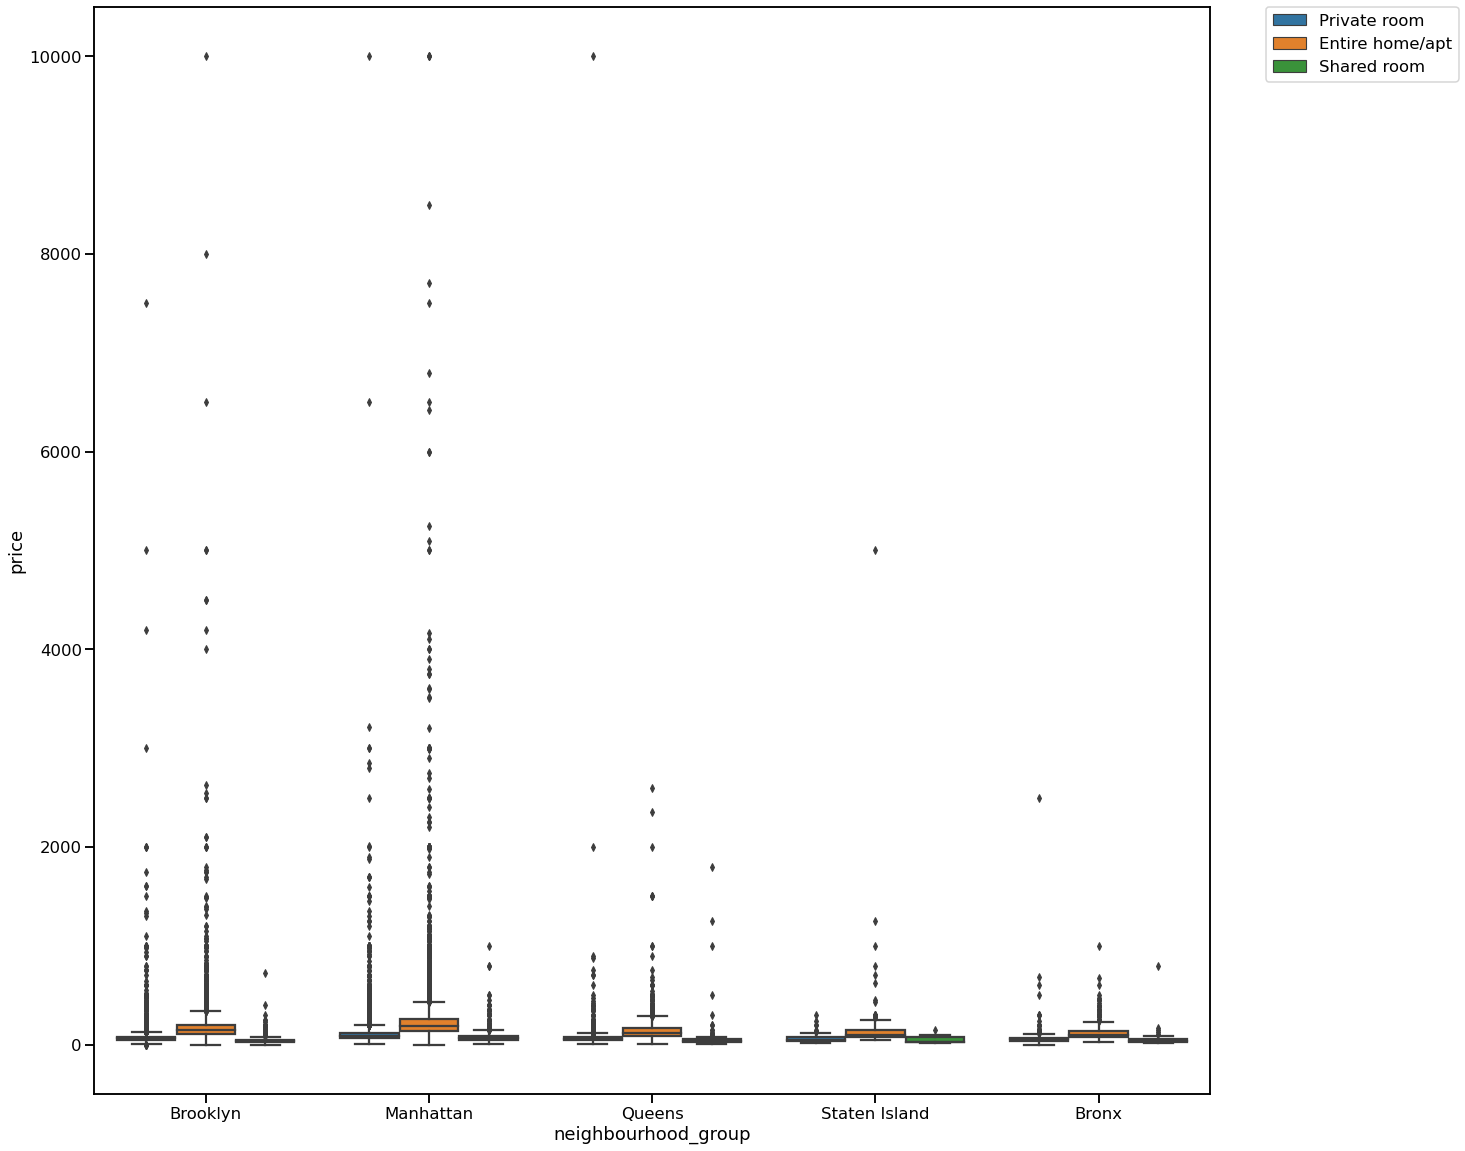

In [269]:
plt.figure(figsize = (20,20))
sns.boxplot(x="neighbourhood_group", y="price",hue = "room_type",data=new_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [270]:
categorical_columns = new_data.select_dtypes('object').columns.tolist()
categorical_columns

['neighbourhood_group', 'room_type']

#### One hot Encoding 

In [271]:
df = pd.get_dummies(new_data, columns = categorical_columns, drop_first= True)
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,149,1,9,0.21,6,365,1,0,0,0,1,0
1,225,1,45,0.38,2,355,0,1,0,0,0,0
2,150,3,0,0.72,1,365,0,1,0,0,1,0
3,89,1,270,4.64,1,194,1,0,0,0,0,0
4,80,10,9,0.10,1,0,0,1,0,0,0,0


In [272]:
df.shape

(48895, 12)

#### Outliers Treatment

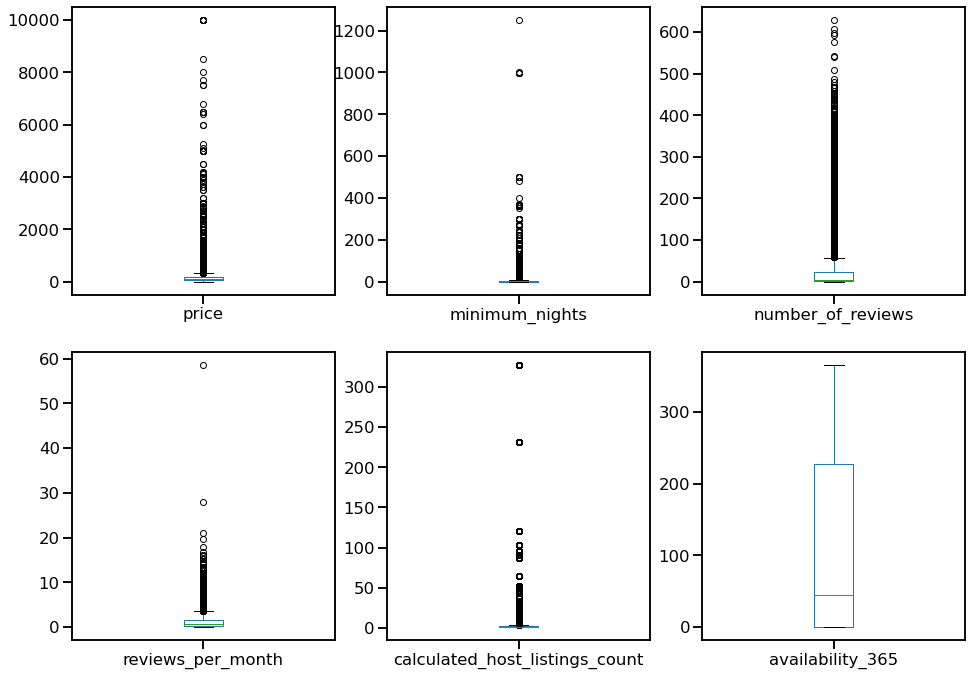

In [273]:
new_data.plot(kind = 'box', subplots = True, layout = (3,3), figsize = (16,18), sharex = False, sharey = False)
plt.show()

In [274]:
df.skew()

price                                19.118939
minimum_nights                       21.827275
number_of_reviews                     3.690635
reviews_per_month                     3.603699
calculated_host_listings_count        7.933174
availability_365                      0.763408
neighbourhood_group_Brooklyn          0.361088
neighbourhood_group_Manhattan         0.229460
neighbourhood_group_Queens            2.400202
neighbourhood_group_Staten Island    11.318186
room_type_Private room                0.174218
room_type_Shared room                 6.259199
dtype: float64

In [275]:
df1 = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]       # For each column, it first computes the Z-score of each value in 
                                                # the column, relative to the column mean and standard deviation. It then takes 
                                                # the absolute Z-score because the direction does not matter, only if it is 
                                                # below the threshold.
                                                # all(axis=1) ensures that for each row, all column satisfy the constraint.
                                                # Finally, the result of this condition is used to index the dataframe.
df1.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,149,1,9,0.21,6,365,1,0,0,0,1,0
1,225,1,45,0.38,2,355,0,1,0,0,0,0
2,150,3,0,0.72,1,365,0,1,0,0,1,0
4,80,10,9,0.10,1,0,0,1,0,0,0,0
5,200,3,74,0.59,1,129,0,1,0,0,0,0


In [276]:
df1.shape

(44144, 12)

#### Feature Scalling

In [277]:
scale = RobustScaler()
df_scaled = scale.fit_transform(df1)

In [278]:
df2 = pd.DataFrame(df_scaled, columns= df1.columns)
df2.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,0.380952,-0.666667,0.20,-0.467890,5.0,1.681818,1.0,0.0,0.0,0.0,1.0,0.0
1,1.104762,-0.666667,2.00,-0.311927,1.0,1.631313,0.0,1.0,0.0,0.0,0.0,0.0
2,0.390476,0.000000,-0.25,0.000000,0.0,1.681818,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.276190,2.333333,0.20,-0.568807,0.0,-0.161616,0.0,1.0,0.0,0.0,0.0,0.0
4,0.866667,0.000000,3.45,-0.119266,0.0,0.489899,0.0,1.0,0.0,0.0,0.0,0.0


## Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

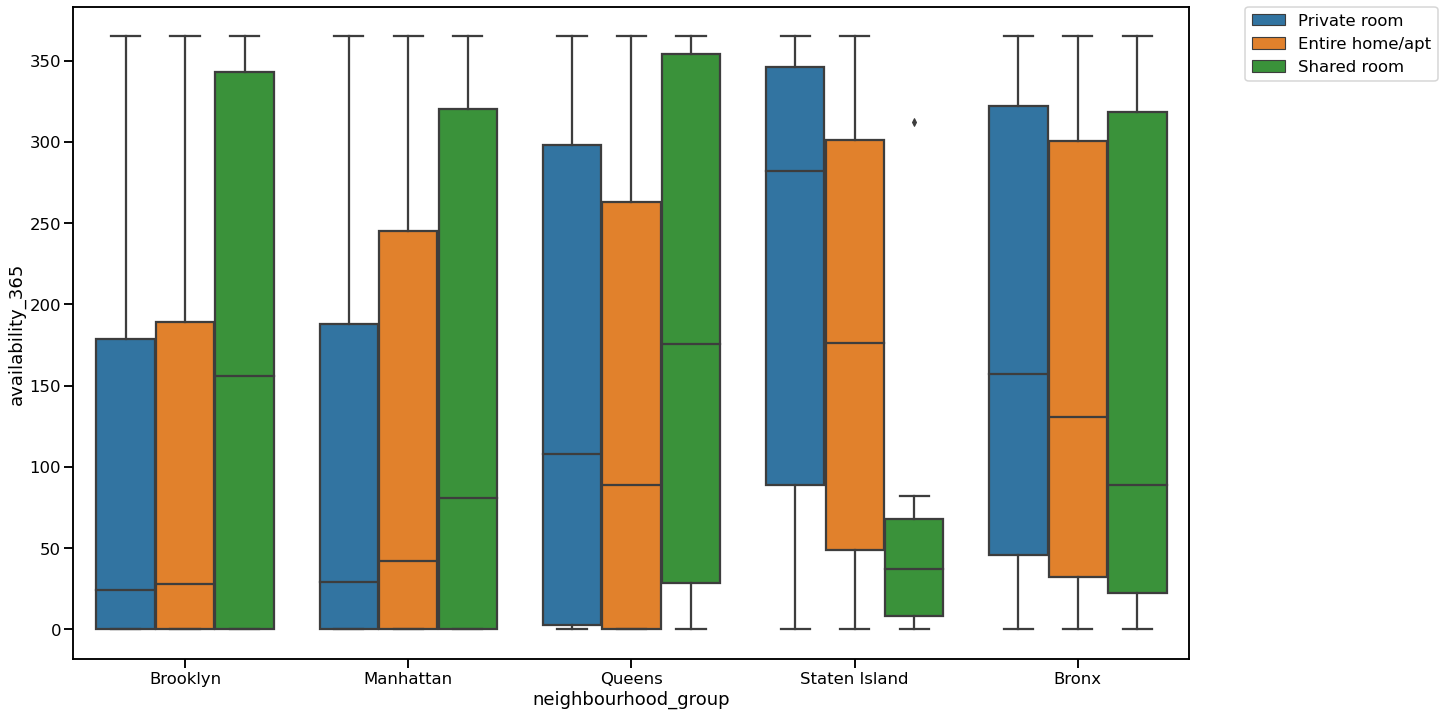

In [279]:
plt.figure(figsize = (20,12))
sns.boxplot(x="neighbourhood_group", y="availability_365",hue = "room_type",data=new_data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

- brooklyn entire private rooms have the lowest availability/highest demand, followed by Manhattan's private room.
- whereas all room types in Staten Island have the lowest demand and higher availability. 


In [280]:
new_data.groupby(['neighbourhood_group'])['price','number_of_reviews','availability_365'].agg(['count', 'mean','median'])

price                    number_of_reviews             \
                     count        mean median             count       mean   
neighbourhood_group                                                          
Bronx                 1091   87.496792     65              1091  26.004583   
Brooklyn             20104  124.383207     90             20104  24.202845   
Manhattan            21661  196.875814    150             21661  20.985596   
Queens                5666   99.517649     75              5666  27.700318   
Staten Island          373  114.812332     75               373  30.941019   

                           availability_365                     
                    median            count        mean median  
neighbourhood_group                                             
Bronx                    9             1091  165.758937    148  
Brooklyn                 6            20104  100.232292     28  
Manhattan                4            21661  111.979410     36  
Queens                   7             5666  144.451818     98  
Staten Island           12              373  199.678284    219

In [281]:
new_data.groupby(['room_type'])['price','number_of_reviews','availability_365'].agg(['count', 'mean','median'])

price                    number_of_reviews                    \
                 count        mean median             count       mean median   
room_type                                                                       
Entire home/apt  25409  211.794246    160             25409  22.842418      5   
Private room     22326   89.780973     70             22326  24.112962      5   
Shared room       1160   70.127586     45              1160  16.600000      4   

                availability_365                     
                           count        mean median  
room_type                                            
Entire home/apt            25409  111.920304     42  
Private room               22326  111.203933     45  
Shared room                 1160  162.000862     90

we can say that 

- Entire home/apt have the highest mean and median price over other room types, followed by Private room and shared room.
- In the neighbourhood group, Manhattan has the highest median price, followed by Brooklyn.

## Formulating at least 3 hypothesis about this data

1) latitude/longitude have very less (<20%) impact on price.

2) as availability decreases price will go high. 

3) number_of_reviews would go higher with calculated_host_listings_count

## Conducting a formal significance test for one of the hypotheses and discuss the results

##### latitude/longitude have very less (<20%) impact on price.

In [300]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [307]:
data[['longitude','latitude','price']].corr()

,longitude,latitude,price
longitude,1.000000,0.084788,-0.150019
latitude,0.084788,1.000000,0.033939
price,-0.150019,0.033939,1.000000


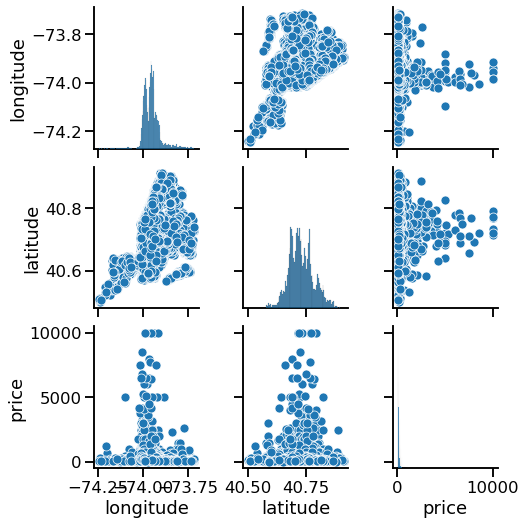

In [308]:
sns.pairplot(data[['longitude','latitude','price']])

## Suggestions for next steps in analyzing this data

The next step in this analysis is to predict the availability of a listing property based on its location, price and other metrics. We can try different regression to fit the data and find out which model best fit the data and make the most accurate prediction.

## A paragraph that summarizes the quality of this data set and a request for additional data if needed

 We can see that the data needed some cleanning. There are some outliers for price and minimum_nights. Other columns such as number_of_reviews and calculated_host_listings_count were highly right skewed, so that we transferred them into categorical variables.and also dropped a few columns from the dataset that are not useful.